# Analisi delle recensioni

## Connessione con pymongo

In [20]:
import pandas as pd
import numpy as np
import json
from pymongo import MongoClient
pd.set_option('precision', 3)
client = MongoClient('localhost', 27000)

In [21]:
db = client["England_hotel"]
db.list_collection_names()

['HotelMean',
 'hotel_full',
 'hotel_price_full',
 'review_count',
 'hotel_final_filer',
 'hotel_final_filter',
 'hotel_final']

In [22]:
data = db['hotel_final_filer']
data.find_one()

{'Address': 'Rockmount',
 'City': 'Tavistock',
 'Country': 'United Kingdom',
 'FullPrice': [{'Booking in last 6 hours': nan,
   'Breakfast included': 0,
   'Check-in Date': '2018-10-04',
   'Dinner included': 0,
   'Free cancellation': 0,
   'Max Guests': 2.0,
   'No prepayment': 0,
   'Price': 305.0,
   'Room': 'Double Room',
   'Room reinforcements': nan,
   'Scraping Date': '2018-07-06',
   '_id': ObjectId('5b9fe5547b4322a5aa93c803'),
   'hotel_id': 'Rockmount_Tavistock'},
  {'Booking in last 6 hours': nan,
   'Breakfast included': 0,
   'Check-in Date': '2018-10-25',
   'Dinner included': 0,
   'Free cancellation': 0,
   'Max Guests': 2.0,
   'No prepayment': 0,
   'Price': 305.0,
   'Room': 'Double Room',
   'Room reinforcements': nan,
   'Scraping Date': '2018-07-06',
   '_id': ObjectId('5b9fe5547b4322a5aa93e020'),
   'hotel_id': 'Rockmount_Tavistock'},
  {'Booking in last 6 hours': nan,
   'Breakfast included': 0,
   'Check-in Date': '2018-10-31',
   'Dinner included': 0,
   'Fr

## Test

In [23]:
Neg1 = []
i = 1
for el in data.aggregate([ { '$match': { 'SummaryPrice.Group' : i } }, { '$project' : { '_id':0, 'Reviews.Negative review' : 1 } } ]):
    for j in el['Reviews']:
        try:
            globals()['Neg'+str(i)].append(j['Negative review'])
        except KeyError:
            pass
len(Neg1)

## Liste di parole

Si creano <i>10</i> liste, cinque per le recensioni positive e altrettante per le negative, in ognuna delle quali sono messe le recensioni di tutti gli hotel suddivisi per stelle.

In [25]:
Neg1 = []
Pos1 = []
Neg2 = []
Pos2 = []
Neg3 = []
Pos3 = []
Neg4 = []
Pos4 = []
Neg5 = []
Pos5 = []

for i in range(1, 6):
    for el in data.aggregate([ { '$match': { 'SummaryPrice.Group' : i } }, { '$project' : { '_id':0, 'Reviews.Negative review' : 1 } } ]):
        for j in el['Reviews']:
            try:
                globals()['Neg'+str(i)].append(j['Negative review'])
            except KeyError:
                pass
        
for i in range(1, 6):
    for el in data.aggregate([ { '$match': { 'SummaryPrice.Group' : i } }, { '$project' : { '_id':0, 'Reviews.Positive review' : 1 } } ]):
        for j in el['Reviews']:
            try:
                globals()['Pos'+str(i)].append(j['Positive review'])
            except KeyError:
                pass

In [26]:
for i in range(1, 6):
    print(len(globals()['Neg'+str(i)]))

404364
377418
379521
427101
414742


In [27]:
for i in range(1, 6):
    print(len(globals()['Pos'+str(i)]))

456812
435469
444413
502381
497828


## Analisi

In [29]:
%reload_ext autotime

import os
os.chdir("C:\\Users\\prowm")

import numpy as np
import json
import re
import nltk
import pandas as pd
from collections import Counter #Conteggio parole
from nltk.corpus import stopwords #Rimozione stopwords
from nltk.stem import WordNetLemmatizer #lemmizzazione

#Wordcloud
import random
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud

In [30]:
lemmatizer = WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')

time: 22.9 ms


## Test

In [32]:
pos_tokens1 = []
for review in Pos1:
    temp_list = review.split(' ')
    for token in temp_list:
        if token != '':
            token = token.lower()
            token = (re.sub('[^a-zA-Z0-9 \n]', '', token)) 
            token = lemmatizer.lemmatize(token, "v")    
            token = lemmatizer.lemmatize(token, "n")
            token = lemmatizer.lemmatize(token, "a")
            if len(token) > 2:
                if token not in stopwords:
                    if token.endswith('dnt') == False: 
                        pos_tokens1.append(token)

time: 2min 59s


Per ogni lista si ottengono i token dalle recensioni, questi token subiscono un processo di <b>lemming</b> e di standardizzazione, ovvero:
* Le parole sono portare in minuscolo
* Sono puliti da segni di punteggiatura e caratteri speciali
* Attraverso la funzione <i>lemmatize</i> si cerca di ricondurre la parola alla propria radice
* Si controlla se sono delle stopwords, in caso negativo sono aggiunte alla nuova lista

In [33]:
pos_tokens2 = []
for review in Pos2:
    temp_list = review.split(' ')
    for token in temp_list:
        if token != '':
            token = token.lower()
            token = (re.sub('[^a-zA-Z0-9 \n]', '', token)) 
            token = lemmatizer.lemmatize(token, "v")    
            token = lemmatizer.lemmatize(token, "n")
            token = lemmatizer.lemmatize(token, "a")
            if len(token) > 2:
                if token not in stopwords:
                    if token.endswith('dnt') == False: 
                        pos_tokens2.append(token)
                        
pos_tokens3 = []
for review in Pos3:
    temp_list = review.split(' ')
    for token in temp_list:
        if token != '':
            token = token.lower()
            token = (re.sub('[^a-zA-Z0-9 \n]', '', token)) 
            token = lemmatizer.lemmatize(token, "v")    
            token = lemmatizer.lemmatize(token, "n")
            token = lemmatizer.lemmatize(token, "a")
            if len(token) > 2:
                if token not in stopwords:
                    if token.endswith('dnt') == False: 
                        pos_tokens3.append(token)
                        
pos_tokens4 = []
for review in Pos4:
    temp_list = review.split(' ')
    for token in temp_list:
        if token != '':
            token = token.lower()
            token = (re.sub('[^a-zA-Z0-9 \n]', '', token)) 
            token = lemmatizer.lemmatize(token, "v")    
            token = lemmatizer.lemmatize(token, "n")
            token = lemmatizer.lemmatize(token, "a")
            if len(token) > 2:
                if token not in stopwords:
                    if token.endswith('dnt') == False: 
                        pos_tokens4.append(token)
                        
pos_tokens5 = []
for review in Pos5:
    temp_list = review.split(' ')
    for token in temp_list:
        if token != '':
            token = token.lower()
            token = (re.sub('[^a-zA-Z0-9 \n]', '', token)) 
            token = lemmatizer.lemmatize(token, "v")    
            token = lemmatizer.lemmatize(token, "n")
            token = lemmatizer.lemmatize(token, "a")
            if len(token) > 2:
                if token not in stopwords:
                    if token.endswith('dnt') == False: 
                        pos_tokens5.append(token)

time: 13min 24s


Stesso processo per le recensioni negative

In [34]:
neg_tokens1 = []
for review in Neg1:
    temp_list = review.split(' ')
    for token in temp_list:
        if token != '':
            token = token.lower()
            token = (re.sub('[^a-zA-Z0-9 \n]', '', token)) 
            token = lemmatizer.lemmatize(token, "v")    
            token = lemmatizer.lemmatize(token, "n")
            token = lemmatizer.lemmatize(token, "a")
            if len(token) > 2:
                if token not in stopwords:
                    if token.endswith('dnt') == False: 
                        neg_tokens1.append(token)
                        
neg_tokens2 = []
for review in Neg2:
    temp_list = review.split(' ')
    for token in temp_list:
        if token != '':
            token = token.lower()
            token = (re.sub('[^a-zA-Z0-9 \n]', '', token)) 
            token = lemmatizer.lemmatize(token, "v")    
            token = lemmatizer.lemmatize(token, "n")
            token = lemmatizer.lemmatize(token, "a")
            if len(token) > 2:
                if token not in stopwords:
                    if token.endswith('dnt') == False: 
                        neg_tokens2.append(token)
                        
neg_tokens3 = []
for review in Neg3:
    temp_list = review.split(' ')
    for token in temp_list:
        if token != '':
            token = token.lower()
            token = (re.sub('[^a-zA-Z0-9 \n]', '', token)) 
            token = lemmatizer.lemmatize(token, "v")    
            token = lemmatizer.lemmatize(token, "n")
            token = lemmatizer.lemmatize(token, "a")
            if len(token) > 2:
                if token not in stopwords:
                    if token.endswith('dnt') == False: 
                        neg_tokens3.append(token)
                        
neg_tokens4 = []
for review in Neg4:
    temp_list = review.split(' ')
    for token in temp_list:
        if token != '':
            token = token.lower()
            token = (re.sub('[^a-zA-Z0-9 \n]', '', token)) 
            token = lemmatizer.lemmatize(token, "v")    
            token = lemmatizer.lemmatize(token, "n")
            token = lemmatizer.lemmatize(token, "a")
            if len(token) > 2:
                if token not in stopwords:
                    if token.endswith('dnt') == False: 
                        neg_tokens4.append(token)
                        
neg_tokens5 = []
for review in Neg5:
    temp_list = review.split(' ')
    for token in temp_list:
        if token != '':
            token = token.lower()
            token = (re.sub('[^a-zA-Z0-9 \n]', '', token)) 
            token = lemmatizer.lemmatize(token, "v")    
            token = lemmatizer.lemmatize(token, "n")
            token = lemmatizer.lemmatize(token, "a")
            if len(token) > 2:
                if token not in stopwords:
                    if token.endswith('dnt') == False: 
                        neg_tokens5.append(token)

time: 27min 39s


## Conteggio parole

Per ogni lista sono estratte le <i>500</i> parole più frequenti

In [36]:
p1 = Counter(pos_tokens1).most_common(500)
p2 = Counter(pos_tokens2).most_common(500)
p3 = Counter(pos_tokens3).most_common(500)
p4 = Counter(pos_tokens4).most_common(500)
p5 = Counter(pos_tokens5).most_common(500)

n1 = Counter(neg_tokens1).most_common(500)
n2 = Counter(neg_tokens2).most_common(500)
n3 = Counter(neg_tokens3).most_common(500)
n4 = Counter(neg_tokens4).most_common(500)
n5 = Counter(neg_tokens5).most_common(500)

time: 15 s


## Test

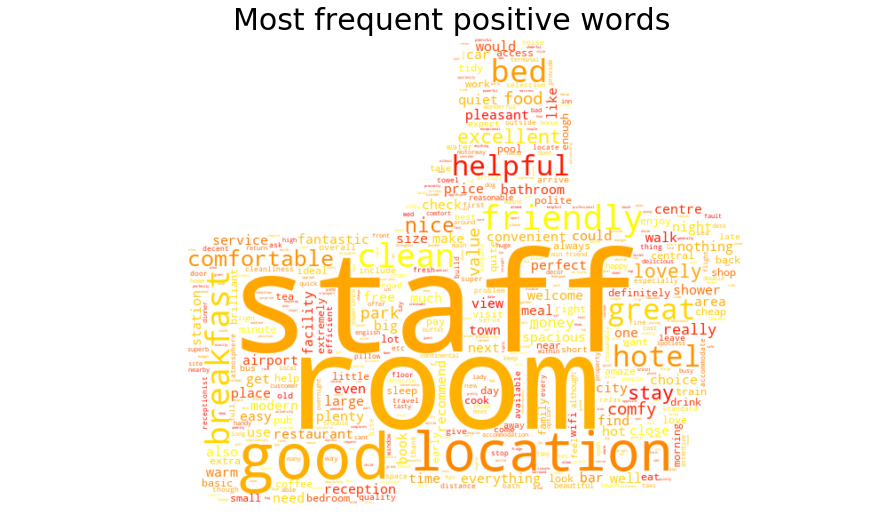

time: 6.39 s


In [37]:
mask = np.array(Image.open("like_sten.png"))

i = 0
diz_word = {}
while i<len(p1):
    temp = p1[i][0]
    diz_word[temp] = p1[i][1]
    i = i+1

        
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["yellow","orange","red"])

wordcloud = WordCloud(width=1080, height=720, background_color='white', max_words=500, mask=mask, colormap=cmap, 
                      random_state=1)
wordcloud.generate_from_frequencies(frequencies=diz_word)
plt.figure(figsize=(15,10))
plt.title("1 Star Hotels - Most frequent positive words", fontsize=30)
plt.imshow(wordcloud, cmap="rainbow", interpolation="bilinear")
plt.axis("off")
plt.show()

## Bigrammi

Si creano i bigrammi per ogni lista concatenando le parole consecutive (sotto è fatto anche per le liste delle parole negative)

In [39]:
ngram_pos_tokens1 = []
ngram_num = 2
for token in range(len(pos_tokens1) - (ngram_num + 1)):
    ngram_pos_tokens1.append(pos_tokens1[token:token+ngram_num])
    
ngram_pos_tokens2 = []
ngram_num = 2
for token in range(len(pos_tokens2) - (ngram_num + 1)):
    ngram_pos_tokens2.append(pos_tokens2[token:token+ngram_num])
    
ngram_pos_tokens3 = []
ngram_num = 2
for token in range(len(pos_tokens3) - (ngram_num + 1)):
    ngram_pos_tokens3.append(pos_tokens3[token:token+ngram_num])
    
ngram_pos_tokens4 = []
ngram_num = 2
for token in range(len(pos_tokens4) - (ngram_num + 1)):
    ngram_pos_tokens4.append(pos_tokens4[token:token+ngram_num])
    
ngram_pos_tokens5 = []
ngram_num = 2
for token in range(len(pos_tokens5) - (ngram_num + 1)):
    ngram_pos_tokens5.append(pos_tokens5[token:token+ngram_num])

time: 1min 22s


In [40]:
ngram_neg_tokens1 = []
ngram_num = 2
for token in range(len(neg_tokens1) - (ngram_num + 1)):
    ngram_neg_tokens1.append(neg_tokens1[token:token+ngram_num])
    
ngram_neg_tokens2 = []
ngram_num = 2
for token in range(len(neg_tokens2) - (ngram_num + 1)):
    ngram_neg_tokens2.append(neg_tokens2[token:token+ngram_num])
    
ngram_neg_tokens3 = []
ngram_num = 2
for token in range(len(neg_tokens3) - (ngram_num + 1)):
    ngram_neg_tokens3.append(neg_tokens3[token:token+ngram_num])
    
ngram_neg_tokens4 = []
ngram_num = 2
for token in range(len(neg_tokens4) - (ngram_num + 1)):
    ngram_neg_tokens4.append(neg_tokens4[token:token+ngram_num])
    
ngram_neg_tokens5 = []
ngram_num = 2
for token in range(len(neg_tokens5) - (ngram_num + 1)):
    ngram_neg_tokens5.append(neg_tokens5[token:token+ngram_num])

time: 4min 7s


## Conteggio bigrammi

Come per i token, si prendono i <i>500</i> bigrammi più comuni per ogni lista

In [97]:
p1b = Counter(tuple(ngram) for ngram in ngram_pos_tokens1).most_common(500)
p2b = Counter(tuple(ngram) for ngram in ngram_pos_tokens2).most_common(500)
p3b = Counter(tuple(ngram) for ngram in ngram_pos_tokens3).most_common(500)
p4b = Counter(tuple(ngram) for ngram in ngram_pos_tokens4).most_common(500)
p5b = Counter(tuple(ngram) for ngram in ngram_pos_tokens5).most_common(500)

n1b = Counter(tuple(ngram) for ngram in ngram_neg_tokens1).most_common(500)
n2b = Counter(tuple(ngram) for ngram in ngram_neg_tokens2).most_common(500)
n3b = Counter(tuple(ngram) for ngram in ngram_neg_tokens3).most_common(500)
n4b = Counter(tuple(ngram) for ngram in ngram_neg_tokens4).most_common(500)
n5b = Counter(tuple(ngram) for ngram in ngram_neg_tokens5).most_common(500)

time: 1min 30s


## Conteggio bigrammi 2

Nel conteggio dei bigrammi si trovano delle coppie che sono uguali con l'ordine delle parole invertito. <br> Ad esempio <i>staff, friendly</i> e <i>friendly, staff</i> sono sostanzialmente lo stesso bigramma con l'ordine delle parole invertito. Il codice seguente unisce sotto un unico bigramma, con il conteggio aggiornato, i bigrammi che rientrano nel caso in esempio.

In [98]:
new_ngram_pos_tokens1 = {}
for i in range(len(p1b)):
    temp = p1b[i][0][0] + ' ' + p1b[i][0][1]
    temp2 = p1b[i][0][1] + ' ' + p1b[i][0][0]
    if temp2 in new_ngram_pos_tokens1.keys():
        new_ngram_pos_tokens1[temp2] = new_ngram_pos_tokens1[temp2] + p1b[i][1]
    else:
        new_ngram_pos_tokens1[temp] = p1b[i][1]
        
new_ngram_pos_tokens2 = {}
for i in range(len(p2b)):
    temp = p2b[i][0][0] + ' ' + p2b[i][0][1]
    temp2 = p2b[i][0][1] + ' ' + p2b[i][0][0]
    if temp2 in new_ngram_pos_tokens2.keys():
        new_ngram_pos_tokens2[temp2] = new_ngram_pos_tokens2[temp2] + p2b[i][1]
    else:
        new_ngram_pos_tokens2[temp] = p2b[i][1]
        
new_ngram_pos_tokens3 = {}
for i in range(len(p3b)):
    temp = p3b[i][0][0] + ' ' + p3b[i][0][1]
    temp2 = p3b[i][0][1] + ' ' + p3b[i][0][0]
    if temp2 in new_ngram_pos_tokens3.keys():
        new_ngram_pos_tokens3[temp2] = new_ngram_pos_tokens3[temp2] + p3b[i][1]
    else:
        new_ngram_pos_tokens3[temp] = p3b[i][1]
        
new_ngram_pos_tokens4 = {}
for i in range(len(p4b)):
    temp = p4b[i][0][0] + ' ' + p4b[i][0][1]
    temp2 = p4b[i][0][1] + ' ' + p4b[i][0][0]
    if temp2 in new_ngram_pos_tokens4.keys():
        new_ngram_pos_tokens4[temp2] = new_ngram_pos_tokens4[temp2] + p4b[i][1]
    else:
        new_ngram_pos_tokens4[temp] = p4b[i][1]
        
new_ngram_pos_tokens5 = {}
for i in range(len(p5b)):
    temp = p5b[i][0][0] + ' ' + p5b[i][0][1]
    temp2 = p5b[i][0][1] + ' ' + p5b[i][0][0]
    if temp2 in new_ngram_pos_tokens5.keys():
        new_ngram_pos_tokens5[temp2] = new_ngram_pos_tokens5[temp2] + p5b[i][1]
    else:
        new_ngram_pos_tokens5[temp] = p5b[i][1]

time: 312 ms


In [99]:
new_ngram_neg_tokens1 = {}
for i in range(len(n1b)):
    temp = n1b[i][0][0] + ' ' + n1b[i][0][1]
    temp2 = n1b[i][0][1] + ' ' + n1b[i][0][0]
    if temp2 in new_ngram_neg_tokens1.keys():
        new_ngram_neg_tokens1[temp2] = new_ngram_neg_tokens1[temp2] + n1b[i][1]
    else:
        new_ngram_neg_tokens1[temp] = n1b[i][1]
        
new_ngram_neg_tokens2 = {}
for i in range(len(n2b)):
    temp = n2b[i][0][0] + ' ' + n2b[i][0][1]
    temp2 = n2b[i][0][1] + ' ' + n2b[i][0][0]
    if temp2 in new_ngram_neg_tokens2.keys():
        new_ngram_neg_tokens2[temp2] = new_ngram_neg_tokens2[temp2] + n2b[i][1]
    else:
        new_ngram_neg_tokens2[temp] = n2b[i][1]
        
new_ngram_neg_tokens3 = {}
for i in range(len(n3b)):
    temp = n3b[i][0][0] + ' ' + n3b[i][0][1]
    temp2 = n3b[i][0][1] + ' ' + n3b[i][0][0]
    if temp2 in new_ngram_neg_tokens3.keys():
        new_ngram_neg_tokens3[temp2] = new_ngram_neg_tokens3[temp2] + n3b[i][1]
    else:
        new_ngram_neg_tokens3[temp] = n3b[i][1]
        
new_ngram_neg_tokens4 = {}
for i in range(len(n4b)):
    temp = n4b[i][0][0] + ' ' + n4b[i][0][1]
    temp2 = n4b[i][0][1] + ' ' + n4b[i][0][0]
    if temp2 in new_ngram_neg_tokens4.keys():
        new_ngram_neg_tokens4[temp2] = new_ngram_neg_tokens4[temp2] + n4b[i][1]
    else:
        new_ngram_neg_tokens4[temp] = n4b[i][1]
        
new_ngram_neg_tokens5 = {}
for i in range(len(n5b)):
    temp = n5b[i][0][0] + ' ' + n5b[i][0][1]
    temp2 = n5b[i][0][1] + ' ' + n5b[i][0][0]
    if temp2 in new_ngram_neg_tokens5.keys():
        new_ngram_neg_tokens5[temp2] = new_ngram_neg_tokens5[temp2] + n5b[i][1]
    else:
        new_ngram_neg_tokens5[temp] = n5b[i][1]

time: 214 ms


## Word cloud con i bigrammi

Per ogni lista è creata una <b>word cloud</b> con i bigrammi più comuni, in fondo sono stampate le 20 coppie di parole più frequenti.

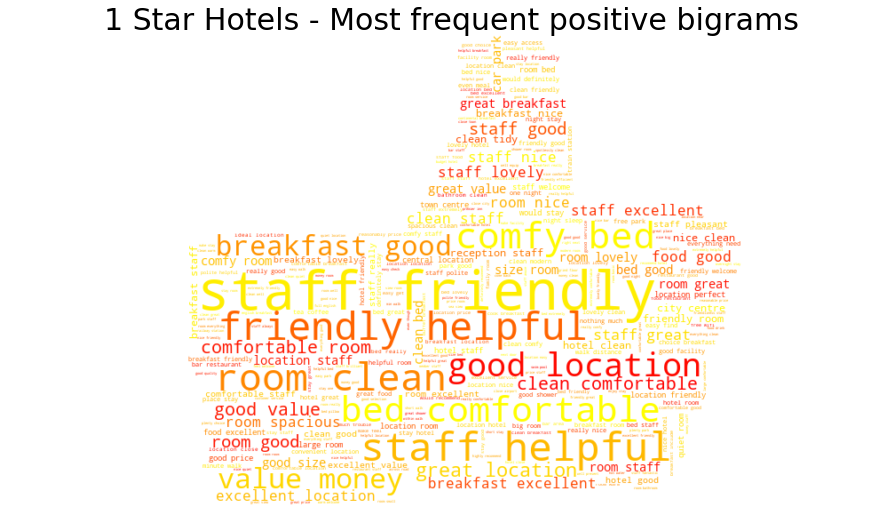

('staff friendly', 54062)
('staff helpful', 26429)
('friendly helpful', 25811)
('room clean', 25200)
('comfy bed', 22908)
('bed comfortable', 22175)
('good location', 21697)
('value money', 20230)
('breakfast good', 19414)
('great location', 16638)
('comfortable room', 13677)
('good value', 13624)
('clean comfortable', 13242)
('staff good', 12066)
('room good', 11500)
('staff great', 9373)
('food good', 8419)
('staff excellent', 8297)
('room nice', 8289)
('staff lovely', 8029)
time: 4.72 s


In [101]:
mask = np.array(Image.open("like_sten.png"))
       
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["yellow","orange","red"])

wordcloud = WordCloud(width=1080, height=720, background_color='white', max_words=500, mask=mask, colormap=cmap, 
                      random_state=1)
wordcloud.generate_from_frequencies(frequencies=new_ngram_pos_tokens1)
plt.figure(figsize=(15,10))
plt.title("1 Star Hotels - Most frequent positive bigrams", fontsize=30)
plt.imshow(wordcloud, cmap="rainbow", interpolation="bilinear")
plt.axis("off")
plt.show()

wcp1 = Counter(new_ngram_pos_tokens1).most_common(20)
for bi in wcp1:
    print(bi)

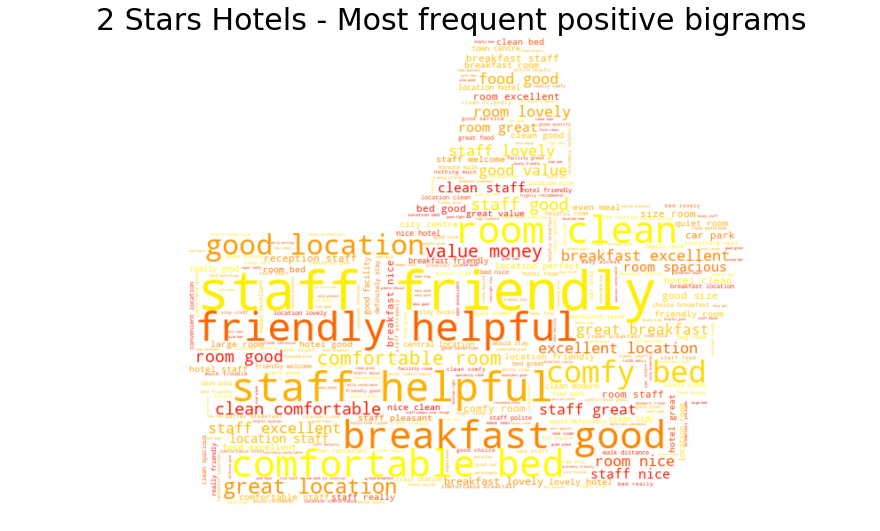

('staff friendly', 51321)
('staff helpful', 25770)
('friendly helpful', 24840)
('breakfast good', 22359)
('room clean', 21726)
('comfortable bed', 21553)
('comfy bed', 21119)
('good location', 19889)
('great location', 18727)
('comfortable room', 14602)
('value money', 12794)
('clean comfortable', 11910)
('staff good', 11781)
('room good', 11158)
('staff great', 9769)
('breakfast excellent', 9616)
('staff excellent', 9241)
('good value', 9122)
('excellent location', 9011)
('room nice', 8672)
time: 5.02 s


In [102]:
mask = np.array(Image.open("like_sten.png"))
       
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["yellow","orange","red"])

wordcloud = WordCloud(width=1080, height=720, background_color='white', max_words=500, mask=mask, colormap=cmap, 
                      random_state=1)
wordcloud.generate_from_frequencies(frequencies=new_ngram_pos_tokens2)
plt.figure(figsize=(15,10))
plt.title("2 Stars Hotels - Most frequent positive bigrams", fontsize=30)
plt.imshow(wordcloud, cmap="rainbow", interpolation="bilinear")
plt.axis("off")
plt.show()

wcp2 = Counter(new_ngram_pos_tokens2).most_common(20)
for bi in wcp2:
    print(bi)

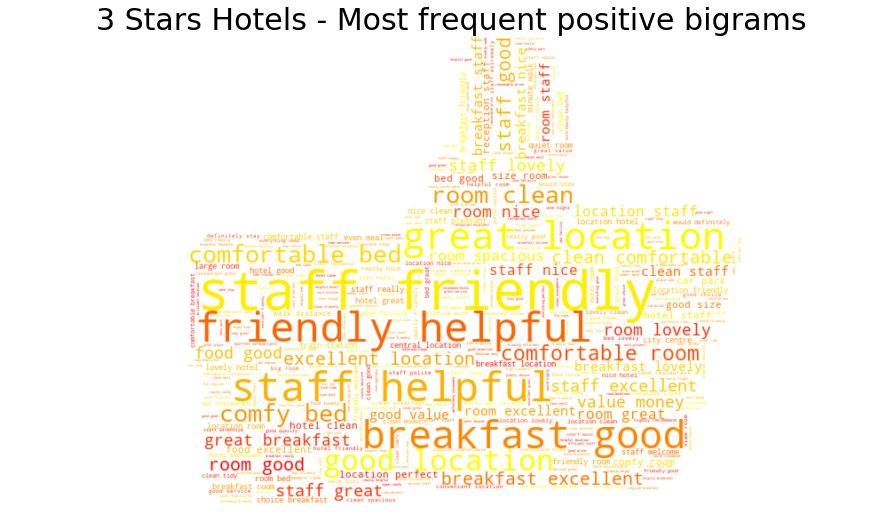

('staff friendly', 51627)
('staff helpful', 26160)
('friendly helpful', 25698)
('breakfast good', 23718)
('great location', 22822)
('good location', 22304)
('comfortable bed', 21149)
('room clean', 20835)
('comfy bed', 20487)
('comfortable room', 15150)
('staff good', 12190)
('breakfast excellent', 11753)
('clean comfortable', 11614)
('room good', 11289)
('excellent location', 11193)
('staff excellent', 10797)
('staff great', 10536)
('great breakfast', 9842)
('value money', 9465)
('room lovely', 9262)
time: 5.32 s


In [103]:
mask = np.array(Image.open("like_sten.png"))
       
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["yellow","orange","red"])

wordcloud = WordCloud(width=1080, height=720, background_color='white', max_words=500, mask=mask, colormap=cmap, 
                      random_state=1)
wordcloud.generate_from_frequencies(frequencies=new_ngram_pos_tokens3)
plt.figure(figsize=(15,10))
plt.title("3 Stars Hotels - Most frequent positive bigrams", fontsize=30)
plt.imshow(wordcloud, cmap="rainbow", interpolation="bilinear")
plt.axis("off")
plt.show()

wcp3 = Counter(new_ngram_pos_tokens3).most_common(20)
for bi in wcp3:
    print(bi)

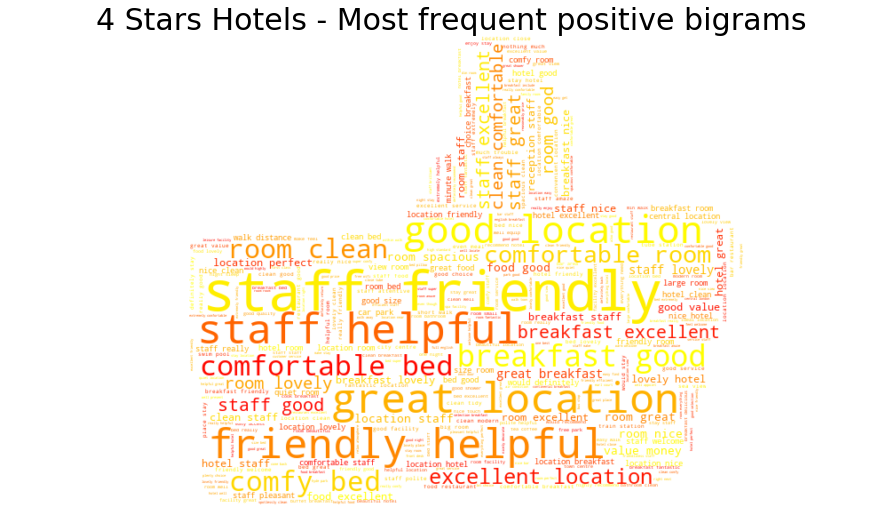

('staff friendly', 56488)
('great location', 29919)
('staff helpful', 29857)
('friendly helpful', 28834)
('good location', 25503)
('breakfast good', 23954)
('comfortable bed', 23769)
('comfy bed', 22496)
('room clean', 21066)
('comfortable room', 16525)
('excellent location', 14990)
('breakfast excellent', 13211)
('staff excellent', 12904)
('staff good', 12658)
('staff great', 12410)
('room good', 11758)
('room lovely', 11656)
('clean comfortable', 11544)
('great breakfast', 10737)
('staff lovely', 10423)
time: 5.03 s


In [104]:
mask = np.array(Image.open("like_sten.png"))
       
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["yellow","orange","red"])

wordcloud = WordCloud(width=1080, height=720, background_color='white', max_words=500, mask=mask, colormap=cmap, 
                      random_state=1)
wordcloud.generate_from_frequencies(frequencies=new_ngram_pos_tokens4)
plt.figure(figsize=(15,10))
plt.title("4 Stars Hotels - Most frequent positive bigrams", fontsize=30)
plt.imshow(wordcloud, cmap="rainbow", interpolation="bilinear")
plt.axis("off")
plt.show()

wcp4 = Counter(new_ngram_pos_tokens4).most_common(20)
for bi in wcp4:
    print(bi)

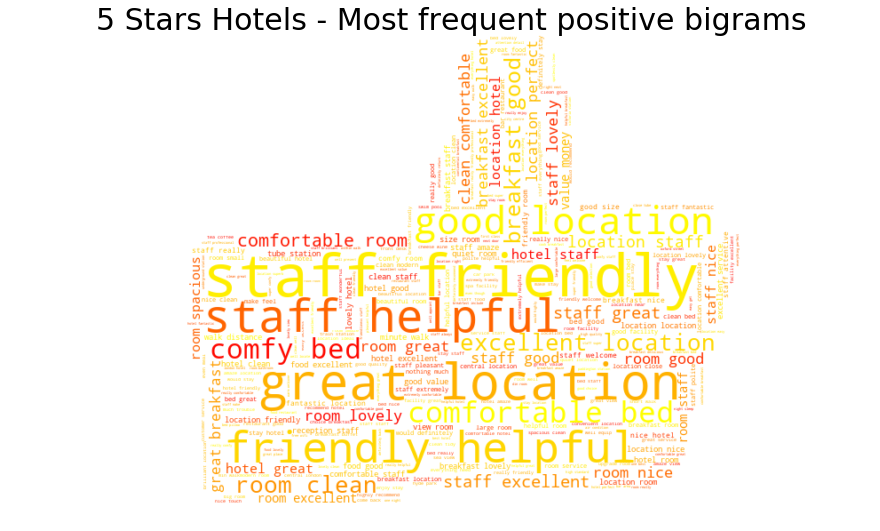

('staff friendly', 50637)
('great location', 35162)
('staff helpful', 28721)
('friendly helpful', 26886)
('good location', 23652)
('comfortable bed', 22817)
('comfy bed', 19872)
('excellent location', 17471)
('room clean', 17193)
('breakfast good', 16389)
('comfortable room', 15185)
('staff excellent', 13925)
('staff great', 13784)
('location staff', 11990)
('room lovely', 10412)
('staff good', 10146)
('breakfast excellent', 9842)
('room good', 9790)
('staff lovely', 9763)
('room great', 9256)
time: 5.33 s


In [105]:
mask = np.array(Image.open("like_sten.png"))
       
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["yellow","orange","red"])

wordcloud = WordCloud(width=1080, height=720, background_color='white', max_words=500, mask=mask, colormap=cmap, 
                      random_state=1)
wordcloud.generate_from_frequencies(frequencies=new_ngram_pos_tokens5)
plt.figure(figsize=(15,10))
plt.title("5 Stars Hotels - Most frequent positive bigrams", fontsize=30)
plt.imshow(wordcloud, cmap="rainbow", interpolation="bilinear")
plt.axis("off")
plt.show()

wcp5 = Counter(new_ngram_pos_tokens5).most_common(20)
for bi in wcp5:
    print(bi)

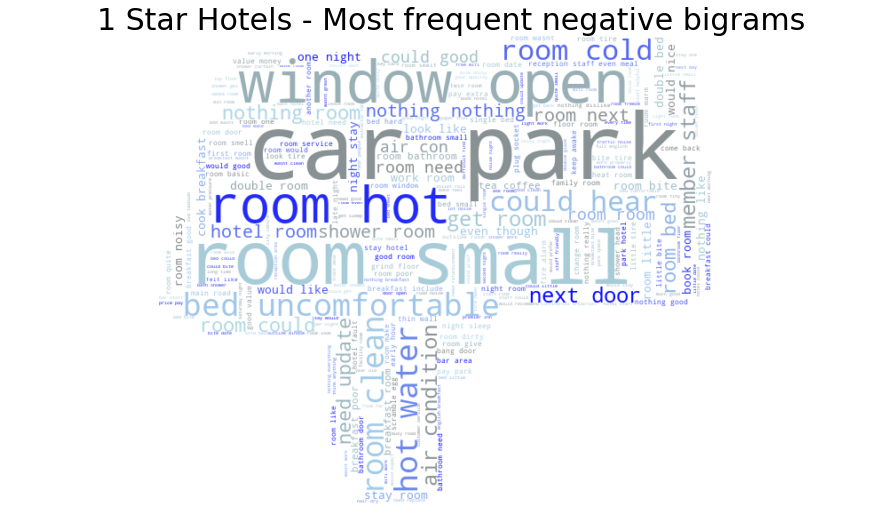

('car park', 12789)
('room small', 7967)
('window open', 6415)
('room hot', 4673)
('bed uncomfortable', 4470)
('hot water', 4461)
('room clean', 4265)
('could hear', 3876)
('room cold', 3794)
('get room', 3655)
('member staff', 3533)
('air condition', 3455)
('next door', 3344)
('nothing room', 3164)
('need update', 3158)
('room could', 3100)
('room bed', 3065)
('nothing nothing', 3045)
('shower room', 3003)
('hotel room', 2957)
time: 5.25 s


In [123]:
mask = np.array(Image.open("dislike_sten.png"))

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["grey","lightblue","blue"])

wordcloud = WordCloud(width=1080, height=720, background_color='white', max_words=500, mask=mask, colormap=cmap, 
                      random_state=1)
wordcloud.generate_from_frequencies(frequencies=new_ngram_neg_tokens1)
plt.figure(figsize=(15,10))
plt.title("1 Star Hotels - Most frequent negative bigrams", fontsize=30)
plt.imshow(wordcloud, cmap="rainbow", interpolation="bilinear")
plt.axis("off")
plt.show()

wcn1 = Counter(new_ngram_neg_tokens1).most_common(20)
for bi in wcn1:
    print(bi)

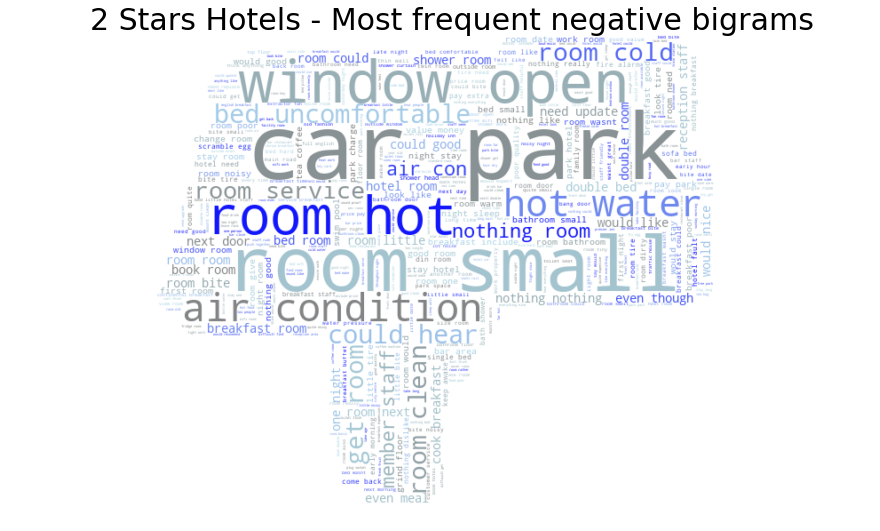

('car park', 12858)
('room small', 8521)
('window open', 5373)
('room hot', 4200)
('air condition', 4030)
('hot water', 3666)
('bed uncomfortable', 3502)
('could hear', 3485)
('room cold', 3205)
('get room', 3179)
('room clean', 3173)
('room service', 3153)
('nothing room', 3126)
('member staff', 3100)
('air con', 3084)
('nothing nothing', 3083)
('hotel room', 3023)
('breakfast room', 3016)
('would like', 2902)
('shower room', 2872)
time: 6.32 s


In [124]:
mask = np.array(Image.open("dislike_sten.png"))

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["grey","lightblue","blue"])

wordcloud = WordCloud(width=1080, height=720, background_color='white', max_words=500, mask=mask, colormap=cmap, 
                      random_state=1)
wordcloud.generate_from_frequencies(frequencies=new_ngram_neg_tokens2)
plt.figure(figsize=(15,10))
plt.title("2 Stars Hotels - Most frequent negative bigrams", fontsize=30)
plt.imshow(wordcloud, cmap="rainbow", interpolation="bilinear")
plt.axis("off")
plt.show()

wcn2 = Counter(new_ngram_neg_tokens2).most_common(20)
for bi in wcn2:
    print(bi)

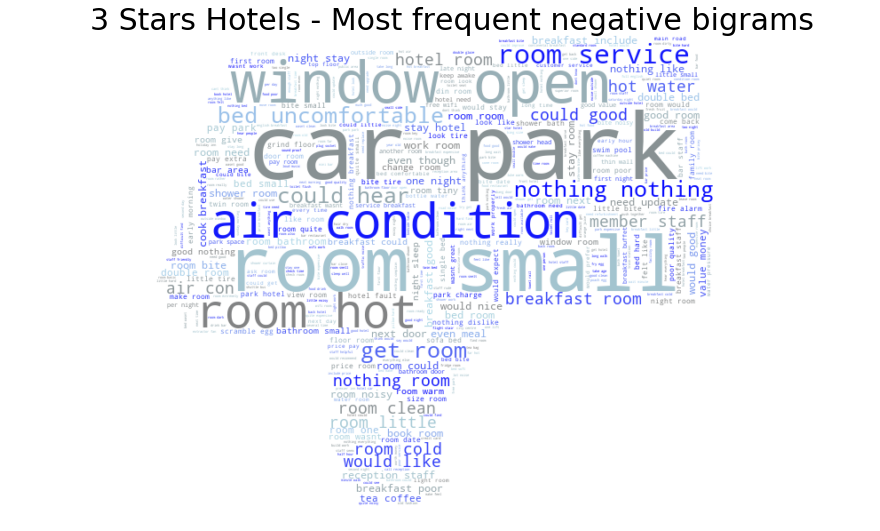

('car park', 14060)
('room small', 9400)
('window open', 5222)
('air condition', 4072)
('room hot', 3882)
('room service', 3831)
('nothing nothing', 3549)
('could hear', 3496)
('bed uncomfortable', 3437)
('get room', 3385)
('breakfast room', 3335)
('room clean', 3286)
('air con', 3181)
('nothing room', 3115)
('member staff', 3061)
('room cold', 3001)
('would like', 2925)
('room little', 2900)
('could good', 2895)
('hotel room', 2884)
time: 6.34 s


In [125]:
mask = np.array(Image.open("dislike_sten.png"))

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["grey","lightblue","blue"])

wordcloud = WordCloud(width=1080, height=720, background_color='white', max_words=500, mask=mask, colormap=cmap, 
                      random_state=1)
wordcloud.generate_from_frequencies(frequencies=new_ngram_neg_tokens3)
plt.figure(figsize=(15,10))
plt.title("3 Stars Hotels - Most frequent negative bigrams", fontsize=30)
plt.imshow(wordcloud, cmap="rainbow", interpolation="bilinear")
plt.axis("off")
plt.show()

wcn3 = Counter(new_ngram_neg_tokens3).most_common(20)
for bi in wcn3:
    print(bi)

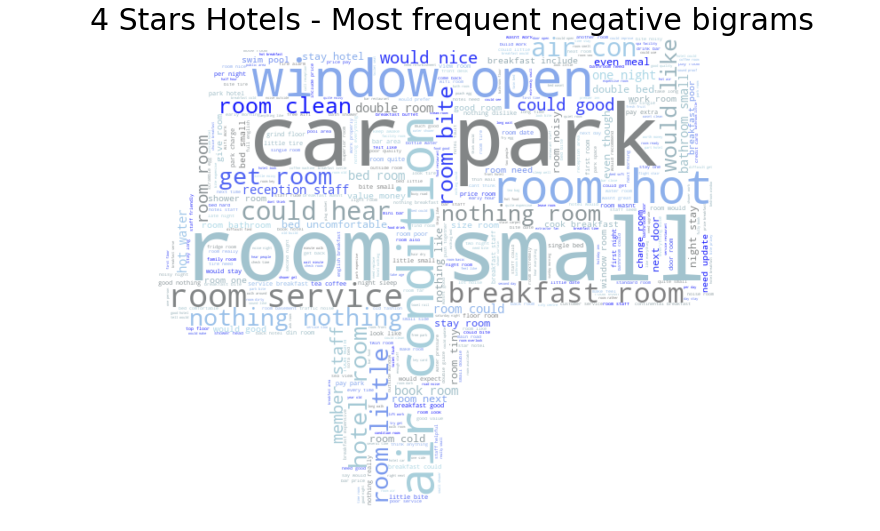

('room small', 15203)
('car park', 14657)
('window open', 6065)
('air condition', 5364)
('room hot', 4863)
('room service', 4457)
('breakfast room', 4420)
('could hear', 3918)
('air con', 3853)
('nothing nothing', 3803)
('get room', 3793)
('hotel room', 3756)
('room little', 3707)
('nothing room', 3653)
('room clean', 3529)
('would like', 3425)
('room bite', 3381)
('could good', 3292)
('member staff', 3193)
('would nice', 3165)
time: 7.43 s


In [126]:
mask = np.array(Image.open("dislike_sten.png"))

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["grey","lightblue","blue"])

wordcloud = WordCloud(width=1080, height=720, background_color='white', max_words=500, mask=mask, colormap=cmap, 
                      random_state=1)
wordcloud.generate_from_frequencies(frequencies=new_ngram_neg_tokens4)
plt.figure(figsize=(15,10))
plt.title("4 Stars Hotels - Most frequent negative bigrams", fontsize=30)
plt.imshow(wordcloud, cmap="rainbow", interpolation="bilinear")
plt.axis("off")
plt.show()

wcn4 = Counter(new_ngram_neg_tokens4).most_common(20)
for bi in wcn4:
    print(bi)

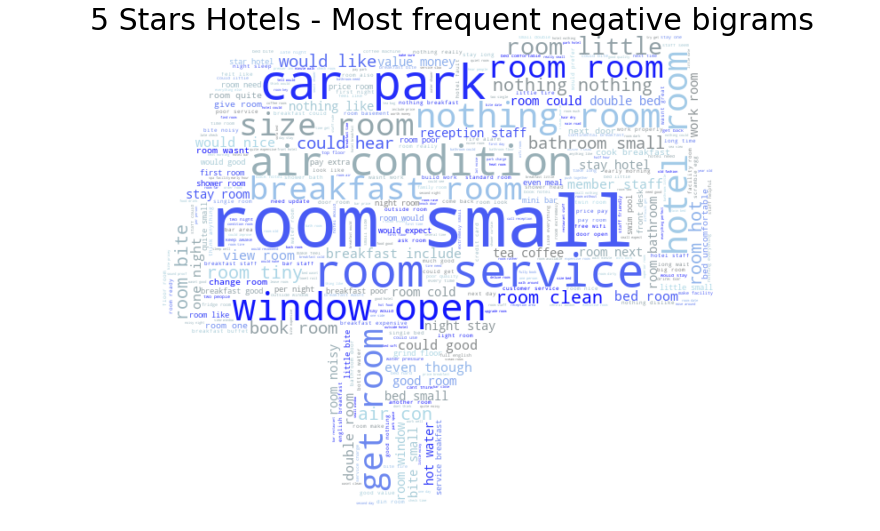

('room small', 20978)
('car park', 7302)
('room service', 6452)
('air condition', 5544)
('window open', 4679)
('nothing room', 4290)
('get room', 4132)
('hotel room', 4080)
('breakfast room', 3981)
('size room', 3966)
('room room', 3925)
('room little', 3834)
('nothing nothing', 3825)
('room clean', 3761)
('room tiny', 3718)
('room bite', 3697)
('air con', 3662)
('room hot', 3574)
('would like', 3321)
('book room', 3213)
time: 6.42 s


In [127]:
mask = np.array(Image.open("dislike_sten.png"))

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["grey","lightblue","blue"])

wordcloud = WordCloud(width=1080, height=720, background_color='white', max_words=500, mask=mask, colormap=cmap, 
                      random_state=1)
wordcloud.generate_from_frequencies(frequencies=new_ngram_neg_tokens5)
plt.figure(figsize=(15,10))
plt.title("5 Stars Hotels - Most frequent negative bigrams", fontsize=30)
plt.imshow(wordcloud, cmap="rainbow", interpolation="bilinear")
plt.axis("off")
plt.show()

wcn5 = Counter(new_ngram_neg_tokens5).most_common(20)
for bi in wcn5:
    print(bi)

## Nuova tokenizzazione

Dalla word cloud precedente si nota un problema: se mentre per le parole positive il significato del bigramma è chiaro, talvota non lo è per quelle negative, in quanto probabilmente è anteposto un <i>no</i> o <i>not</i> che è stato filtrato precedentemente. <br> Volendo avere una visione più completa si possono guardare i trigrammi.

In [112]:
neg_tokens1_bis = []
for review in Neg1:
    temp_list = review.split(' ')
    for token in temp_list:
        if token != '':
            token = token.lower()
            token = (re.sub('[^a-zA-Z0-9 \n]', '', token)) 
            token = lemmatizer.lemmatize(token, "v")    
            token = lemmatizer.lemmatize(token, "n")
            token = lemmatizer.lemmatize(token, "a")
            if token == 'no' or token == 'not':
                neg_tokens1_bis.append(token)
            elif len(token) > 2:
                if token not in stopwords:
                    if token.endswith('dnt') == False: 
                        neg_tokens1_bis.append(token)
                        
neg_tokens2_bis = []
for review in Neg2:
    temp_list = review.split(' ')
    for token in temp_list:
        if token != '':
            token = token.lower()
            token = (re.sub('[^a-zA-Z0-9 \n]', '', token)) 
            token = lemmatizer.lemmatize(token, "v")    
            token = lemmatizer.lemmatize(token, "n")
            token = lemmatizer.lemmatize(token, "a")
            if token == 'no' or token == 'not':
                neg_tokens2_bis.append(token)
            elif len(token) > 2:
                if token not in stopwords:
                    if token.endswith('dnt') == False: 
                        neg_tokens2_bis.append(token)
                        
neg_tokens3_bis = []
for review in Neg3:
    temp_list = review.split(' ')
    for token in temp_list:
        if token != '':
            token = token.lower()
            token = (re.sub('[^a-zA-Z0-9 \n]', '', token)) 
            token = lemmatizer.lemmatize(token, "v")    
            token = lemmatizer.lemmatize(token, "n")
            token = lemmatizer.lemmatize(token, "a")
            if token == 'no' or token == 'not':
                neg_tokens3_bis.append(token)
            elif len(token) > 2:
                if token not in stopwords:
                    if token.endswith('dnt') == False: 
                        neg_tokens3_bis.append(token)
                        
neg_tokens4_bis = []
for review in Neg4:
    temp_list = review.split(' ')
    for token in temp_list:
        if token != '':
            token = token.lower()
            token = (re.sub('[^a-zA-Z0-9 \n]', '', token)) 
            token = lemmatizer.lemmatize(token, "v")    
            token = lemmatizer.lemmatize(token, "n")
            token = lemmatizer.lemmatize(token, "a")
            if token == 'no' or token == 'not':
                neg_tokens4_bis.append(token)
            elif len(token) > 2:
                if token not in stopwords:
                    if token.endswith('dnt') == False: 
                        neg_tokens4_bis.append(token)
                        
neg_tokens5_bis = []
for review in Neg5:
    temp_list = review.split(' ')
    for token in temp_list:
        if token != '':
            token = token.lower()
            token = (re.sub('[^a-zA-Z0-9 \n]', '', token)) 
            token = lemmatizer.lemmatize(token, "v")    
            token = lemmatizer.lemmatize(token, "n")
            token = lemmatizer.lemmatize(token, "a")
            if token == 'no' or token == 'not':
                neg_tokens5_bis.append(token)
            elif len(token) > 2:
                if token not in stopwords:
                    if token.endswith('dnt') == False: 
                        neg_tokens5_bis.append(token)

time: 23min 17s


In [113]:
n1bis = Counter(neg_tokens1_bis).most_common(500)
n2bis = Counter(neg_tokens2_bis).most_common(500)
n3bis = Counter(neg_tokens3_bis).most_common(500)
n4bis = Counter(neg_tokens4_bis).most_common(500)
n5bis = Counter(neg_tokens5_bis).most_common(500)

time: 3.75 s


## Trigrammi

In [114]:
ngram_neg_tokens1_bis = []
ngram_num = 3
for token in range(len(neg_tokens1_bis) - (ngram_num + 1)):
    ngram_neg_tokens1_bis.append(neg_tokens1_bis[token:token+ngram_num])
    
ngram_neg_tokens2_bis = []
ngram_num = 3
for token in range(len(neg_tokens2_bis) - (ngram_num + 1)):
    ngram_neg_tokens2_bis.append(neg_tokens2_bis[token:token+ngram_num])
    
ngram_neg_tokens3_bis = []
ngram_num = 3
for token in range(len(neg_tokens3_bis) - (ngram_num + 1)):
    ngram_neg_tokens3_bis.append(neg_tokens3_bis[token:token+ngram_num])
    
ngram_neg_tokens4_bis = []
ngram_num = 3
for token in range(len(neg_tokens4_bis) - (ngram_num + 1)):
    ngram_neg_tokens4_bis.append(neg_tokens4_bis[token:token+ngram_num])
    
ngram_neg_tokens5_bis = []
ngram_num = 3
for token in range(len(neg_tokens5_bis) - (ngram_num + 1)):
    ngram_neg_tokens5_bis.append(neg_tokens5_bis[token:token+ngram_num])

time: 9min 27s


In [115]:
n1b_bis = Counter(tuple(ngram) for ngram in ngram_neg_tokens1_bis).most_common(500)
n2b_bis = Counter(tuple(ngram) for ngram in ngram_neg_tokens2_bis).most_common(500)
n3b_bis = Counter(tuple(ngram) for ngram in ngram_neg_tokens3_bis).most_common(500)
n4b_bis = Counter(tuple(ngram) for ngram in ngram_neg_tokens4_bis).most_common(500)
n5b_bis = Counter(tuple(ngram) for ngram in ngram_neg_tokens5_bis).most_common(500)

time: 45 s


Nel caso dei trigrammi ci sono <i>6</i> possibili combinazioni di parole da tenere in considerazione

In [116]:
new_ngram_neg_tokens1_bis = {}
for i in range(len(n1b_bis)):
    temp = n1b_bis[i][0][0] + ' ' + n1b_bis[i][0][1] + ' ' + n1b_bis[i][0][2]
    temp2 = n1b_bis[i][0][0] + ' ' + n1b_bis[i][0][2] + ' ' + n1b_bis[i][0][1]
    temp3 = n1b_bis[i][0][1] + ' ' + n1b_bis[i][0][0] + ' ' + n1b_bis[i][0][2]
    temp4 = n1b_bis[i][0][1] + ' ' + n1b_bis[i][0][2] + ' ' + n1b_bis[i][0][0]
    temp5 = n1b_bis[i][0][2] + ' ' + n1b_bis[i][0][0] + ' ' + n1b_bis[i][0][1]
    temp6 = n1b_bis[i][0][2] + ' ' + n1b_bis[i][0][1] + ' ' + n1b_bis[i][0][0]
    if temp2 in new_ngram_neg_tokens1_bis.keys():
        new_ngram_neg_tokens1_bis[temp2] = new_ngram_neg_tokens1_bis[temp2] + n1b_bis[i][1]
    elif temp3 in new_ngram_neg_tokens1_bis.keys():
        new_ngram_neg_tokens1_bis[temp3] = new_ngram_neg_tokens1_bis[temp3] + n1b_bis[i][1]
    elif temp4 in new_ngram_neg_tokens1_bis.keys():
        new_ngram_neg_tokens1_bis[temp4] = new_ngram_neg_tokens1_bis[temp4] + n1b_bis[i][1]
    elif temp5 in new_ngram_neg_tokens1_bis.keys():
        new_ngram_neg_tokens1_bis[temp5] = new_ngram_neg_tokens1_bis[temp5] + n1b_bis[i][1]
    elif temp6 in new_ngram_neg_tokens1_bis.keys():
        new_ngram_neg_tokens1_bis[temp6] = new_ngram_neg_tokens1_bis[temp6] + n1b_bis[i][1]
    else:
        new_ngram_neg_tokens1_bis[temp] = n1b_bis[i][1]
        
new_ngram_neg_tokens2_bis = {}
for i in range(len(n2b_bis)):
    temp = n2b_bis[i][0][0] + ' ' + n2b_bis[i][0][1] + ' ' + n2b_bis[i][0][2]
    temp2 = n2b_bis[i][0][0] + ' ' + n2b_bis[i][0][2] + ' ' + n2b_bis[i][0][1]
    temp3 = n2b_bis[i][0][1] + ' ' + n2b_bis[i][0][0] + ' ' + n2b_bis[i][0][2]
    temp4 = n2b_bis[i][0][1] + ' ' + n2b_bis[i][0][2] + ' ' + n2b_bis[i][0][0]
    temp5 = n2b_bis[i][0][2] + ' ' + n2b_bis[i][0][0] + ' ' + n2b_bis[i][0][1]
    temp6 = n2b_bis[i][0][2] + ' ' + n2b_bis[i][0][1] + ' ' + n2b_bis[i][0][0]
    if temp2 in new_ngram_neg_tokens2_bis.keys():
        new_ngram_neg_tokens2_bis[temp2] = new_ngram_neg_tokens2_bis[temp2] + n2b_bis[i][1]
    elif temp3 in new_ngram_neg_tokens2_bis.keys():
        new_ngram_neg_tokens2_bis[temp3] = new_ngram_neg_tokens2_bis[temp3] + n2b_bis[i][1]
    elif temp4 in new_ngram_neg_tokens2_bis.keys():
        new_ngram_neg_tokens2_bis[temp4] = new_ngram_neg_tokens2_bis[temp4] + n2b_bis[i][1]
    elif temp5 in new_ngram_neg_tokens2_bis.keys():
        new_ngram_neg_tokens2_bis[temp5] = new_ngram_neg_tokens2_bis[temp5] + n2b_bis[i][1]
    elif temp6 in new_ngram_neg_tokens2_bis.keys():
        new_ngram_neg_tokens2_bis[temp6] = new_ngram_neg_tokens2_bis[temp6] + n2b_bis[i][1]
    else:
        new_ngram_neg_tokens2_bis[temp] = n2b_bis[i][1]
        
new_ngram_neg_tokens3_bis = {}
for i in range(len(n3b_bis)):
    temp = n3b_bis[i][0][0] + ' ' + n3b_bis[i][0][1] + ' ' + n3b_bis[i][0][2]
    temp2 = n3b_bis[i][0][0] + ' ' + n3b_bis[i][0][2] + ' ' + n3b_bis[i][0][1]
    temp3 = n3b_bis[i][0][1] + ' ' + n3b_bis[i][0][0] + ' ' + n3b_bis[i][0][2]
    temp4 = n3b_bis[i][0][1] + ' ' + n3b_bis[i][0][2] + ' ' + n3b_bis[i][0][0]
    temp5 = n3b_bis[i][0][2] + ' ' + n3b_bis[i][0][0] + ' ' + n3b_bis[i][0][1]
    temp6 = n3b_bis[i][0][2] + ' ' + n3b_bis[i][0][1] + ' ' + n3b_bis[i][0][0]
    if temp2 in new_ngram_neg_tokens3_bis.keys():
        new_ngram_neg_tokens3_bis[temp2] = new_ngram_neg_tokens3_bis[temp2] + n3b_bis[i][1]
    elif temp3 in new_ngram_neg_tokens3_bis.keys():
        new_ngram_neg_tokens3_bis[temp3] = new_ngram_neg_tokens3_bis[temp3] + n3b_bis[i][1]
    elif temp4 in new_ngram_neg_tokens3_bis.keys():
        new_ngram_neg_tokens3_bis[temp4] = new_ngram_neg_tokens3_bis[temp4] + n3b_bis[i][1]
    elif temp5 in new_ngram_neg_tokens3_bis.keys():
        new_ngram_neg_tokens3_bis[temp5] = new_ngram_neg_tokens3_bis[temp5] + n3b_bis[i][1]
    elif temp6 in new_ngram_neg_tokens3_bis.keys():
        new_ngram_neg_tokens3_bis[temp6] = new_ngram_neg_tokens3_bis[temp6] + n3b_bis[i][1]
    else:
        new_ngram_neg_tokens3_bis[temp] = n3b_bis[i][1]
        
new_ngram_neg_tokens4_bis = {}
for i in range(len(n4b_bis)):
    temp = n4b_bis[i][0][0] + ' ' + n4b_bis[i][0][1] + ' ' + n4b_bis[i][0][2]
    temp2 = n4b_bis[i][0][0] + ' ' + n4b_bis[i][0][2] + ' ' + n4b_bis[i][0][1]
    temp3 = n4b_bis[i][0][1] + ' ' + n4b_bis[i][0][0] + ' ' + n4b_bis[i][0][2]
    temp4 = n4b_bis[i][0][1] + ' ' + n4b_bis[i][0][2] + ' ' + n4b_bis[i][0][0]
    temp5 = n4b_bis[i][0][2] + ' ' + n4b_bis[i][0][0] + ' ' + n4b_bis[i][0][1]
    temp6 = n4b_bis[i][0][2] + ' ' + n4b_bis[i][0][1] + ' ' + n4b_bis[i][0][0]
    if temp2 in new_ngram_neg_tokens4_bis.keys():
        new_ngram_neg_tokens4_bis[temp2] = new_ngram_neg_tokens4_bis[temp2] + n4b_bis[i][1]
    elif temp3 in new_ngram_neg_tokens4_bis.keys():
        new_ngram_neg_tokens4_bis[temp3] = new_ngram_neg_tokens4_bis[temp3] + n4b_bis[i][1]
    elif temp4 in new_ngram_neg_tokens4_bis.keys():
        new_ngram_neg_tokens4_bis[temp4] = new_ngram_neg_tokens4_bis[temp4] + n4b_bis[i][1]
    elif temp5 in new_ngram_neg_tokens4_bis.keys():
        new_ngram_neg_tokens4_bis[temp5] = new_ngram_neg_tokens4_bis[temp5] + n4b_bis[i][1]
    elif temp6 in new_ngram_neg_tokens4_bis.keys():
        new_ngram_neg_tokens4_bis[temp6] = new_ngram_neg_tokens4_bis[temp6] + n4b_bis[i][1]
    else:
        new_ngram_neg_tokens4_bis[temp] = n4b_bis[i][1]
        
new_ngram_neg_tokens5_bis = {}
for i in range(len(n5b_bis)):
    temp = n5b_bis[i][0][0] + ' ' + n5b_bis[i][0][1] + ' ' + n5b_bis[i][0][2]
    temp2 = n5b_bis[i][0][0] + ' ' + n5b_bis[i][0][2] + ' ' + n5b_bis[i][0][1]
    temp3 = n5b_bis[i][0][1] + ' ' + n5b_bis[i][0][0] + ' ' + n5b_bis[i][0][2]
    temp4 = n5b_bis[i][0][1] + ' ' + n5b_bis[i][0][2] + ' ' + n5b_bis[i][0][0]
    temp5 = n5b_bis[i][0][2] + ' ' + n5b_bis[i][0][0] + ' ' + n5b_bis[i][0][1]
    temp6 = n5b_bis[i][0][2] + ' ' + n5b_bis[i][0][1] + ' ' + n5b_bis[i][0][0]
    if temp2 in new_ngram_neg_tokens5_bis.keys():
        new_ngram_neg_tokens5_bis[temp2] = new_ngram_neg_tokens5_bis[temp2] + n5b_bis[i][1]
    elif temp3 in new_ngram_neg_tokens5_bis.keys():
        new_ngram_neg_tokens5_bis[temp3] = new_ngram_neg_tokens5_bis[temp3] + n5b_bis[i][1]
    elif temp4 in new_ngram_neg_tokens5_bis.keys():
        new_ngram_neg_tokens5_bis[temp4] = new_ngram_neg_tokens5_bis[temp4] + n5b_bis[i][1]
    elif temp5 in new_ngram_neg_tokens5_bis.keys():
        new_ngram_neg_tokens5_bis[temp5] = new_ngram_neg_tokens5_bis[temp5] + n5b_bis[i][1]
    elif temp6 in new_ngram_neg_tokens5_bis.keys():
        new_ngram_neg_tokens5_bis[temp6] = new_ngram_neg_tokens5_bis[temp6] + n5b_bis[i][1]
    else:
        new_ngram_neg_tokens5_bis[temp] = n5b_bis[i][1]

time: 1.02 s


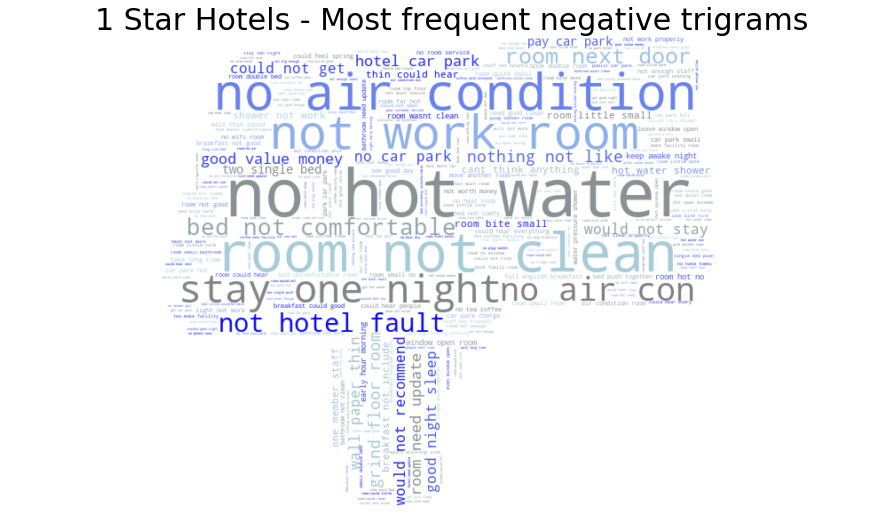

('no hot water', 2112)
('room not clean', 1382)
('no air condition', 1163)
('not work room', 1027)
('stay one night', 964)
('no air con', 934)
('not hotel fault', 927)
('bed not comfortable', 911)
('room next door', 872)
('nothing not like', 862)
('grind floor room', 834)
('room need update', 740)
('good value money', 715)
('hotel car park', 706)
('would not recommend', 657)
('would not stay', 656)
('no car park', 655)
('could not get', 651)
('good night sleep', 636)
('wall paper thin', 599)
time: 3.24 s


In [118]:
mask = np.array(Image.open("dislike_sten.png"))

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["grey","lightblue","blue"])

wordcloud = WordCloud(width=1080, height=720, background_color='white', max_words=500, mask=mask, colormap=cmap, 
                      random_state=1)
wordcloud.generate_from_frequencies(frequencies=new_ngram_neg_tokens1_bis)
plt.figure(figsize=(15,10))
plt.title("1 Star Hotels - Most frequent negative trigrams", fontsize=30)
plt.imshow(wordcloud, cmap="rainbow", interpolation="bilinear")
plt.axis("off")
plt.show()

wcn1_bis = Counter(new_ngram_neg_tokens1_bis).most_common(20)
for bi in wcn1_bis:
    print(bi)

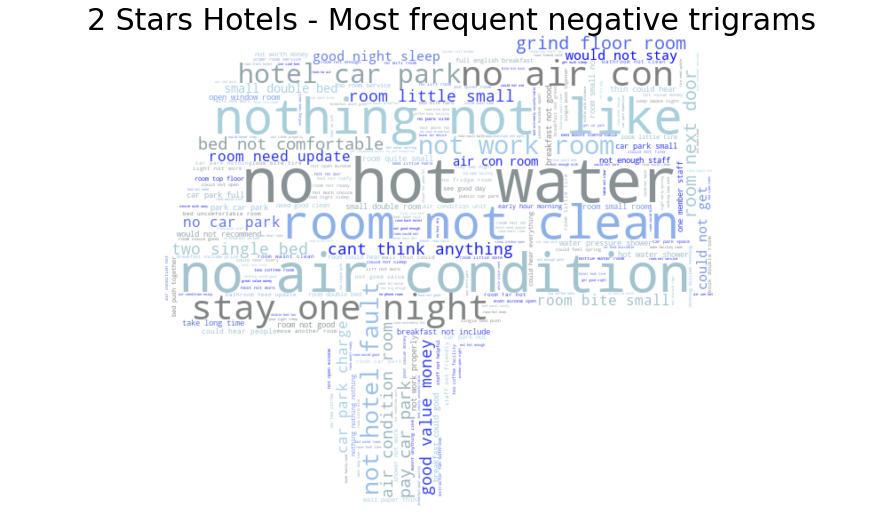

('no hot water', 1553)
('no air condition', 1168)
('nothing not like', 1020)
('room not clean', 955)
('stay one night', 938)
('no air con', 933)
('hotel car park', 932)
('not work room', 909)
('not hotel fault', 797)
('grind floor room', 788)
('room next door', 779)
('bed not comfortable', 741)
('pay car park', 731)
('cant think anything', 670)
('air condition room', 661)
('room little small', 640)
('good value money', 632)
('two single bed', 616)
('room need update', 607)
('room bite small', 576)
time: 2.9 s


In [119]:
mask = np.array(Image.open("dislike_sten.png"))

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["grey","lightblue","blue"])

wordcloud = WordCloud(width=1080, height=720, background_color='white', max_words=500, mask=mask, colormap=cmap, 
                      random_state=1)
wordcloud.generate_from_frequencies(frequencies=new_ngram_neg_tokens2_bis)
plt.figure(figsize=(15,10))
plt.title("2 Stars Hotels - Most frequent negative trigrams", fontsize=30)
plt.imshow(wordcloud, cmap="rainbow", interpolation="bilinear")
plt.axis("off")
plt.show()

wcn2_bis = Counter(new_ngram_neg_tokens2_bis).most_common(20)
for bi in wcn2_bis:
    print(bi)

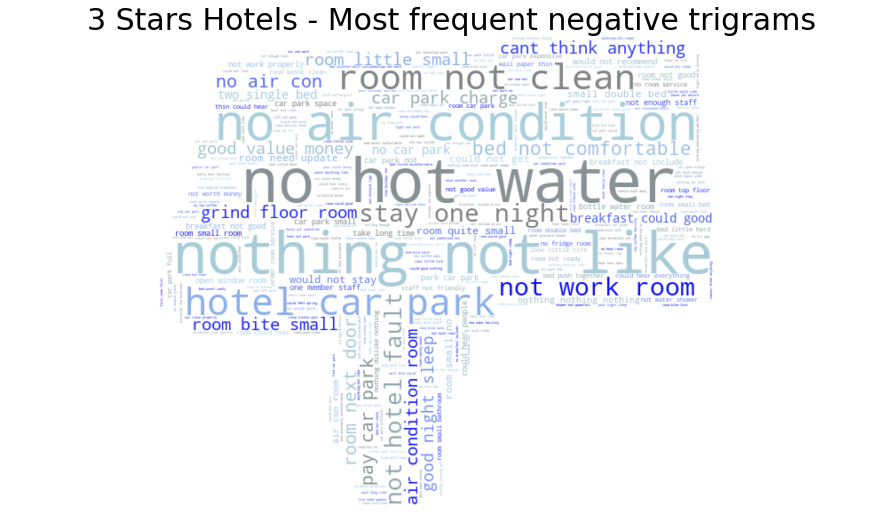

('no hot water', 1153)
('nothing not like', 1123)
('no air condition', 1078)
('hotel car park', 1023)
('room not clean', 943)
('stay one night', 917)
('not work room', 893)
('not hotel fault', 796)
('bed not comfortable', 792)
('no air con', 753)
('room next door', 733)
('pay car park', 725)
('cant think anything', 703)
('grind floor room', 682)
('air condition room', 673)
('room bite small', 639)
('room little small', 636)
('good value money', 608)
('car park charge', 608)
('good night sleep', 570)
time: 3.64 s


In [120]:
mask = np.array(Image.open("dislike_sten.png"))

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["grey","lightblue","blue"])

wordcloud = WordCloud(width=1080, height=720, background_color='white', max_words=500, mask=mask, colormap=cmap, 
                      random_state=1)
wordcloud.generate_from_frequencies(frequencies=new_ngram_neg_tokens3_bis)
plt.figure(figsize=(15,10))
plt.title("3 Stars Hotels - Most frequent negative trigrams", fontsize=30)
plt.imshow(wordcloud, cmap="rainbow", interpolation="bilinear")
plt.axis("off")
plt.show()

wcn3_bis = Counter(new_ngram_neg_tokens3_bis).most_common(20)
for bi in wcn3_bis:
    print(bi)

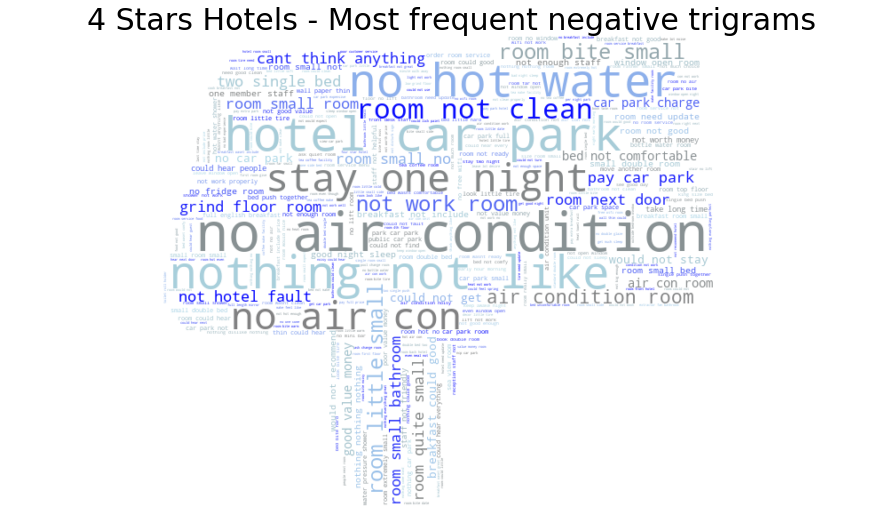

('no air condition', 1567)
('hotel car park', 1203)
('nothing not like', 1174)
('no hot water', 1163)
('stay one night', 1075)
('no air con', 1042)
('room not clean', 1023)
('room bite small', 970)
('room little small', 938)
('not work room', 937)
('air condition room', 913)
('cant think anything', 910)
('not hotel fault', 883)
('room small room', 861)
('grind floor room', 854)
('room next door', 815)
('room small no', 804)
('pay car park', 798)
('room quite small', 783)
('two single bed', 745)
time: 4.44 s


In [121]:
mask = np.array(Image.open("dislike_sten.png"))

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["grey","lightblue","blue"])

wordcloud = WordCloud(width=1080, height=720, background_color='white', max_words=500, mask=mask, colormap=cmap, 
                      random_state=1)
wordcloud.generate_from_frequencies(frequencies=new_ngram_neg_tokens4_bis)
plt.figure(figsize=(15,10))
plt.title("4 Stars Hotels - Most frequent negative trigrams", fontsize=30)
plt.imshow(wordcloud, cmap="rainbow", interpolation="bilinear")
plt.axis("off")
plt.show()

wcn4_bis = Counter(new_ngram_neg_tokens4_bis).most_common(20)
for bi in wcn4_bis:
    print(bi)

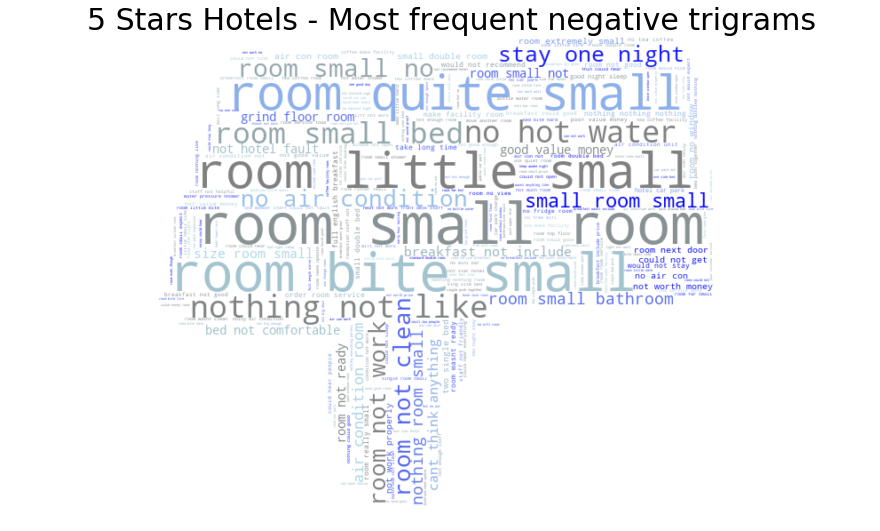

('room small room', 1750)
('room bite small', 1478)
('room little small', 1334)
('room quite small', 1295)
('nothing not like', 1215)
('no hot water', 1160)
('room small bed', 1133)
('room small no', 1106)
('no air condition', 1058)
('room not clean', 1039)
('room not work', 1037)
('stay one night', 1012)
('small room small', 1002)
('room small bathroom', 976)
('nothing room small', 954)
('air condition room', 853)
('breakfast not include', 848)
('size room small', 823)
('cant think anything', 798)
('grind floor room', 732)
time: 3.74 s


In [122]:
mask = np.array(Image.open("dislike_sten.png"))

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["grey","lightblue","blue"])

wordcloud = WordCloud(width=1080, height=720, background_color='white', max_words=500, mask=mask, colormap=cmap, 
                      random_state=1)
wordcloud.generate_from_frequencies(frequencies=new_ngram_neg_tokens5_bis)
plt.figure(figsize=(15,10))
plt.title("5 Stars Hotels - Most frequent negative trigrams", fontsize=30)
plt.imshow(wordcloud, cmap="rainbow", interpolation="bilinear")
plt.axis("off")
plt.show()

wcn5_bis = Counter(new_ngram_neg_tokens5_bis).most_common(20)
for bi in wcn5_bis:
    print(bi)